In [1]:
from keras.datasets import mnist

import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# 항상 같은 랜덤값으로 돌릴수 있도록 seed 설정
# mnist 데이터 불러오기(keras datasets 이용)
seed = 42
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# mnist 데이터 이미지를 binary로 바꾸고, 2차원이하로 바꾸기 위해 reshape을 해줌
# (RandomForestClassifier에 들어가려면 2차원 이하여야 함)
ret, X_train = cv2.threshold(x_train, 100, 1, cv2.THRESH_BINARY)
ret_2, X_test = cv2.threshold(x_test, 100, 1, cv2.THRESH_BINARY)
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [5]:
# randomforest 학습
clf = RandomForestClassifier(n_jobs=-1, n_estimators=500, max_features='auto',random_state=seed)
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [6]:
# test set으로 accuracy 계산
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print('accuracy : ', accuracy)

accuracy :  0.9704


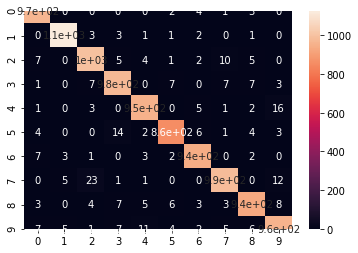

In [7]:
# confusion matrix 생성
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

In [8]:
# test 이미지 하나 넣어봄
results = clf.predict(X_test[100].reshape(-1,784))

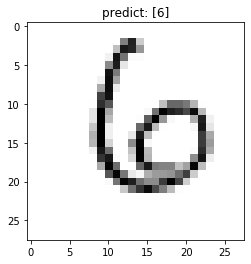

In [9]:
# random forest가 예측한 값과 실제 이미지 출력
plt.imshow(x_test[100], cmap='binary')
plt.title('predict: ' + str(results))
plt.show()